# Les bases de la dynamique des populations

La première étape consiste à appréhender la croissance géométique (temps discret) et exponentielle (temps continu).

## La suite de Fibonacci

<!---
<img src="https://upload.wikimedia.org/wikipedia/commons/3/35/Fibonacci2.jpg">
--->

[Leonardo Fibonacci](https://en.wikipedia.org/wiki/Fibonacci) (c. 1170-c. 1250) considera en 1202 un problème de croissance de populations de lapins:

> Combien de couples de lapins obtiendrons-nous à la fin de l'année si, 
> commençant avec un couple, chacun des couples produisait chaque mois un 
> nouveau couple lequel deviendrait productif au second mois de son existence ?

Si $x_{n}$ désigne la taille de la population au mois $n$ et si on suppose que $x_{1}=x_{2}=1$, alors au troisième mois ce couple se reproduit donc $x_{3}=2$, le mois suivant le premier couple se reproduit à nouveau et le couple obtenu au mois précédent n'est pas encore productif donc $x_{4}=3$, ainsi de suite:
![suite de Fibonacci](./images/suite_fibonacci.png)
(en rouge les couples en âge de se reproduire). À un mois $n$ donné, la population comprend tous les couples du mois $n-2$ qui se sont reproduits au mois $n-1$ donc $2\,x_{n-2}$ auxquels s'ajoutent les couples produits au mois $n-1$ qui ne sont pas en âge de se reproduire, c'est-à-dire $x_{n-1}-x_{n-2}$. Ainsi $x_{n}=2\,x_{n-2}+(x_{n-1}-x_{n-2})$ d'où la relation de récurrence:
\begin{align}
\label{eq.fibonacci}
 x_{n} = x_{n-1}+x_{n-2}\,,\ x_{1}=x_{2}=1\,.
\end{align}
Cette [suite](https://en.wikipedia.org/wiki/Fibonacci_number) dite de Fibonacci est décrite sous la forme d'un système dynamique en temps discret \label{eq.fibonacci}, i.e. la taille de la population n'est explicitement pas donnée, seule la dynamique de croissance locale en temps l'est.
Il faudra attendre plus de cinq cent ans pour que la formule explicite de cette suite soit établie: 
$$
x_{n}=[{(1+\sqrt{5})^n-(1-\sqrt{5})^{n}}]/[{2^n\,\sqrt{5}}]\,.
$$
Sur la plan de la dynamique de populations cette suite ne présente que peu d'intérêt. En effet elle croit plus vite que $n^2$ mais nettement moins vite que $2^n$. Elle a plus étonnamment trouvé des applications en [architecture des plantes](https://en.wikipedia.org/wiki/Patterns_in_nature). 

## Croissances géométrique et exponentielle


Modèle linéaire
$$
   \dot x(t) = (\lambda-\mu)\,x(t)\,,\ x(0)=x_0
$$
taux de naissance $\lambda>0$, taux de mort $\mu>0$
In equation \eqref{eq:sample}, we find the value of an
interesting integral:

\begin{equation}
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
  \label{eq:sample}
\end{equation}

In [51]:
import numpy as np
population = lambda t: x0*np.exp((rb-rd)*t)

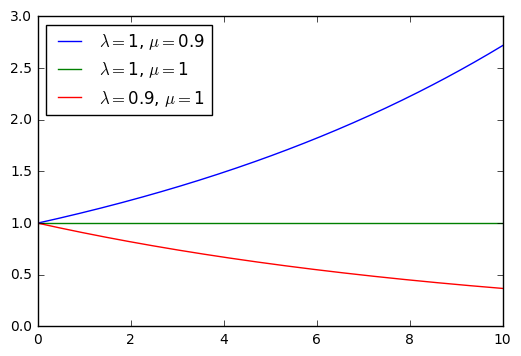

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

t0, t1 = 0, 10
temps = np.linspace(t0,t1,200, endpoint=True)

legende = []
for [x0, rb, rd] in [[1, 1, 0.9], [1, 1, 1], [1, 0.9, 1]]:
    plt.plot(temps, population(temps))
    legende = legende + [r'$\lambda=$'+str(rb)+r', $\mu=$'+str(rd),]
plt.legend(legende, loc='upper left')
plt.show()

## Croissance logistique
$$
  \dot x(t) = r\,\left(1-\frac{x(t)}{K}\right)\,x(t)\,,\ x(0)=x_0
$$
admet l'unique solution:
$$
  x(t) =  K \,\frac{1}{1+\left(\frac {K}{x_{0}} - 1\right) \,e^{-r\,t}}\,.
$$

In [53]:
population = lambda t: K*1/(1+ (K/x0-1) * np.exp(-r*t))

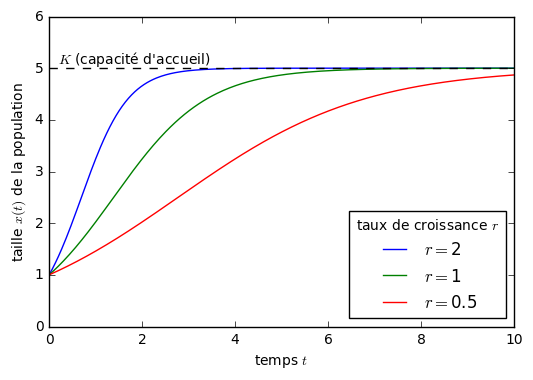

In [54]:
t0, t1 = 0, 10

temps = np.linspace(t0,t1,300, endpoint=True)

x0, K = 1, 5
legende = []
for r in [2, 1, 0.5]:
    plt.plot(temps, population(temps))
    legende = legende + [r'$r=$'+str(r),]    
plt.ylim([0,K*1.2])
plt.legend(legende, loc='lower right',title=r'taux de croissance $r$')
plt.plot([t0, t1], [K, K], color="k", linestyle='--')
plt.text((t1-t0)/50, K, r"$K$ (capacité d'accueil)", 
         verticalalignment='bottom', horizontalalignment='left')
plt.xlabel(r'temps $t$')
plt.ylabel(r'taille $x(t)$ de la population')
plt.show()

## Modèle de Lotka-Volterra

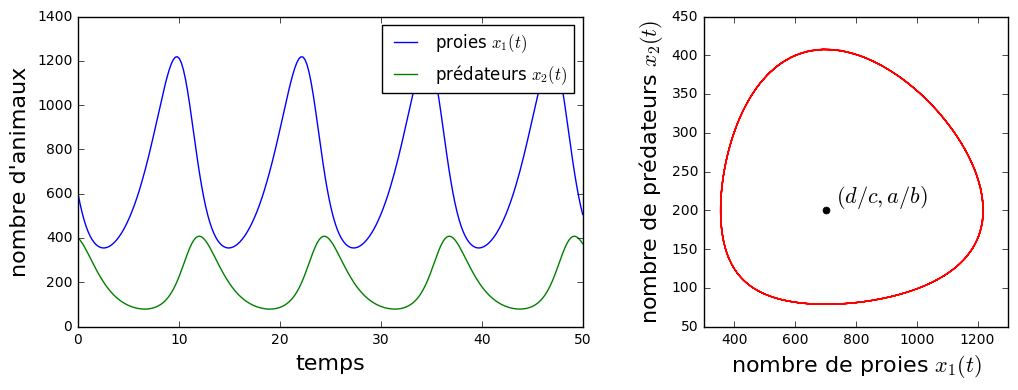

In [55]:
from scipy.integrate import odeint
import matplotlib.gridspec as gridspec

a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = odeint(f, xy0, t)

fig = plt.subplots(1, 2, figsize=(12, 4))

gs = gridspec.GridSpec(1, 2, width_ratios=[8.3, 5], wspace=0.3)

ax0 = plt.subplot(gs[0])
ax0.plot(t, xy_t[:,0], label=r"proies $x_1(t)$")
ax0.plot(t, xy_t[:,1], label=r"prédateurs $x_2(t)$")
ax0.set_xlabel("temps", fontsize=16)
ax0.set_ylabel("nombre d'animaux", fontsize=16)
ax0.legend()
ax1 = plt.subplot(gs[1])
ax1.plot(xy_t[:,0], xy_t[:,1], color="r")
ax1.set_xlabel(r"nombre de proies $x_1(t)$", fontsize=16)
ax1.set_ylabel(r"nombre de prédateurs $x_2(t)$", fontsize=16)
marker_style = dict(linestyle=':', markersize=10)
ax1.plot([d/c], [a/b], marker='.', **marker_style, color="k")
ax1.text(1.05*d/c, 1.05*a/b, r'$(d/c,a/b)$', fontsize=16)

from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('1_edo_lv.pdf') as pdf:
    pdf.savefig(bbox_inches='tight')
    d = pdf.infodict()
    d['Title'] = '1_edo_lv'
    plt.show()